# Linear Regression with built in function.

In [6]:
#single variable
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


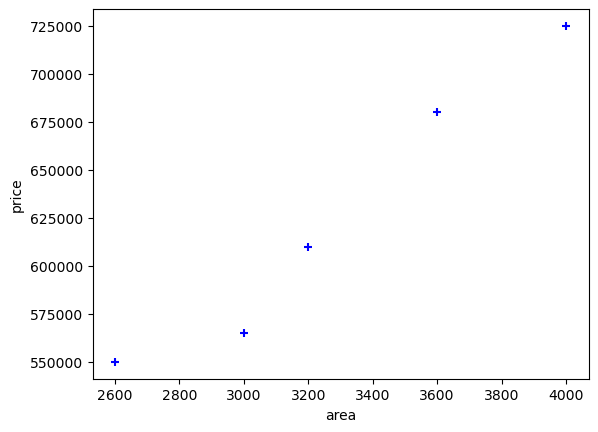

In [10]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color = 'blue', marker = '+')

In [18]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [20]:
reg.coef_

array([135.78767123])

In [22]:
reg.intercept_

180616.43835616432

In [28]:
reg.predict([[3500]])

C:\Users\Ashitha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([655873.28767123])

In [32]:
#multiple variable
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("homeprices_multiple.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [38]:
median = df.bedrooms.median()
median

4.0

In [42]:
df = df.fillna(median)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [46]:
x = df.iloc[:, 0:3]
y = df.iloc[:, 3]

In [50]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [52]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [54]:
reg.intercept_

221323.00186540408

In [60]:
reg.predict([[2600, 3, 30]])

C:\Users\Ashitha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([485900.45388978])

# Linear Regression without built in function

In [64]:
import pandas as pd

data = pd.read_csv("test.csv")
data

,x,y
0,7,9.542324
1,88,92.519705
2,88,87.667042
3,65,64.096606
4,19,17.902133
...,...,...
999995,44,43.526669
999996,87,88.657287
999997,10,5.657638
999998,92,84.304019


In [66]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split

# Linear regression functions
def linear_regression(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x_i * y_i for x_i, y_i in zip(x, y))
    sum_x2 = sum(x_i**2 for x_i in x)

    # Slope (m) and Intercept (b)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    b = (sum_y - m * sum_x) / n
    return m, b

def predict(x, m, b):
    return [m * x_i + b for x_i in x]

def mean_squared_error(y_true, y_pred):
    return sum((y_t - y_p)**2 for y_t, y_p in zip(y_true, y_pred)) / len(y_true)

# Load real dataset from CSV
def load_dataset(filepath):
    x, y = [], []
    with open(filepath, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row if any
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return x, y

# Split the data into train and test sets
def split_data(x, y, test_size=0.2):
    return train_test_split(x, y, test_size=test_size, random_state=42)

# Main execution
dataset_path = "test.csv"
x, y = load_dataset(dataset_path)

# Split the dataset
x_train, x_test, y_train, y_test = split_data(x, y)

# Train the model using the training set
m, b = linear_regression(x_train, y_train)
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Predict on the test set
predictions = predict(x_test, m, b)

# Create a DataFrame for test set, predictions, and actual labels
df = pd.DataFrame({
    "Test Set (x)": x_test,
    "Actual Labels (y)": y_test,
    "Predictions": predictions
    })

print("\nTest Set, Predictions, and Actual Labels:")
print(df)

# Evaluate the model using the test set
mse = mean_squared_error(y_test, predictions)
print(f"\nMean Squared Error on Test Set: {mse}")

Slope (m): 1.0000012711995447
Intercept (b): -0.0008879031505901366

Test Set, Predictions, and Actual Labels:
        Test Set (x)  Actual Labels (y)  Predictions
0               86.0          86.799992    85.999221
1               48.0          46.395593    47.999173
2               81.0          78.213789    80.999215
3               45.0          47.025158    44.999169
4               65.0          60.183043    64.999195
...              ...                ...          ...
199995           9.0           5.676652     8.999124
199996          23.0          21.367387    22.999141
199997          42.0          41.578086    41.999165
199998          10.0           8.410292     9.999125
199999         100.0         100.681268    99.999239

[200000 rows x 3 columns]

Mean Squared Error on Test Set: 8.999943649154915


# Decision Tree with built in function

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [81]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [83]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [85]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [87]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [91]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 4, 28]], dtype=int64)

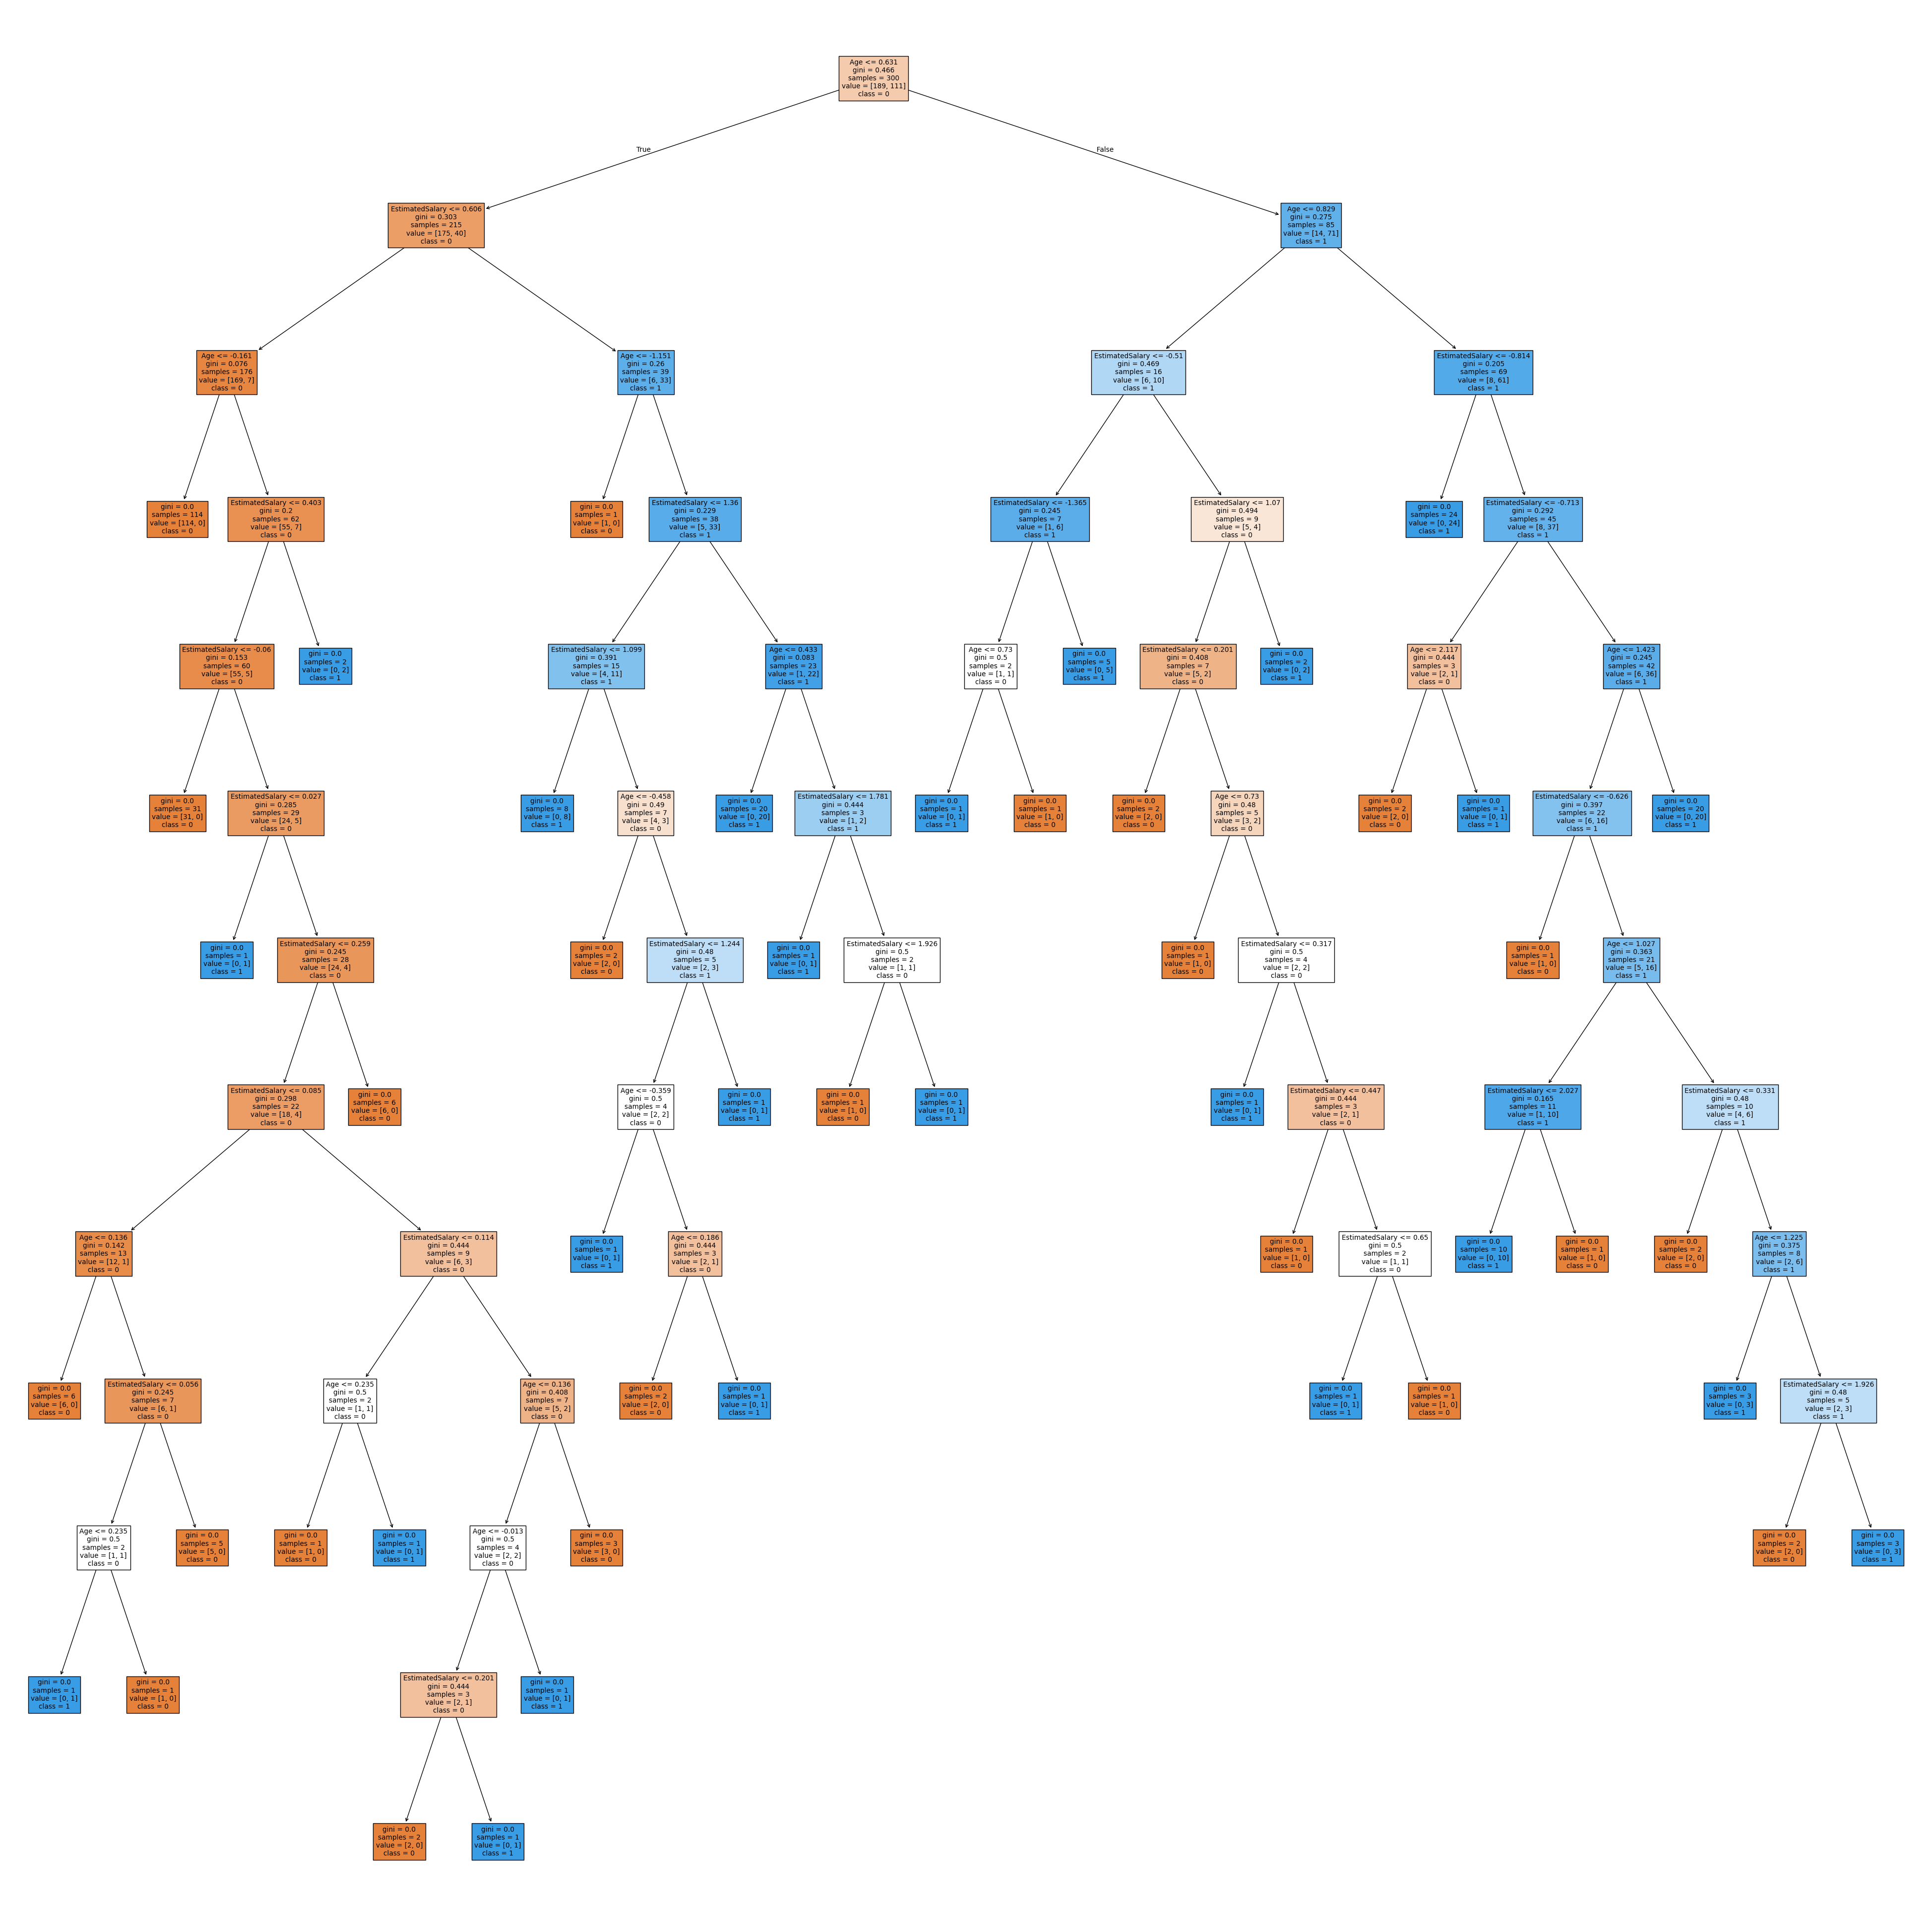

In [95]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(classifier, feature_names=['Age', 'EstimatedSalary'], class_names=['0', '1'], filled=True)
plt.show()

In [97]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:", accuracy_score(y_pred, y_test))

The accuracy score is: 0.9


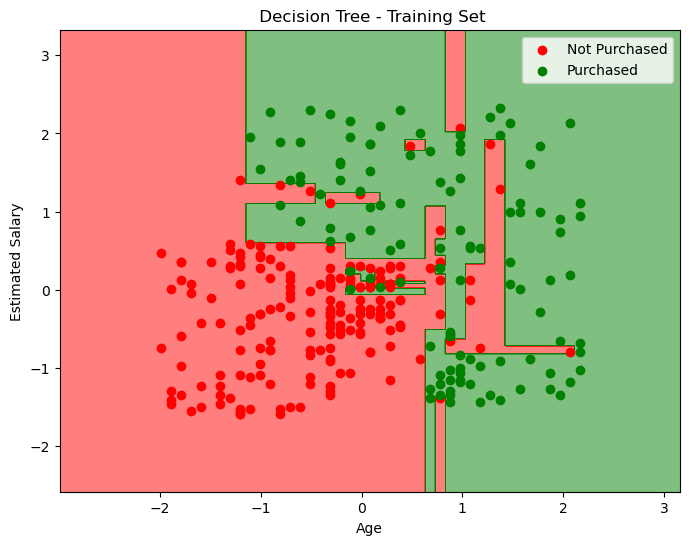

In [105]:
# Visualizing the Training set results 
from matplotlib.colors import ListedColormap 
 
# Create a meshgrid to plot the decision boundary 
X1, X2 = np.meshgrid(np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1, step=0.01), np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01)) 
 
# Use the classifier to predict the class labels for each point in the meshgrid 
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T) 
Z = Z.reshape(X1.shape) 
 
# Create a color map for the plot 
cmap = ListedColormap(('red', 'green')) 
 
# Plot the training set data points 
plt.figure(figsize=(8, 6)) 
plt.contourf(X1, X2, Z, alpha=0.5, cmap=cmap) 
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Not Purchased') 
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='green', label='Purchased') 
plt.title(' Decision Tree - Training Set') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show()

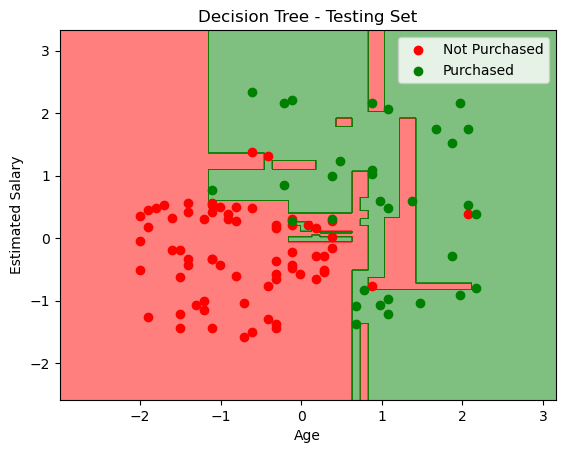

In [103]:
# Visualizing the Testing set results 
from matplotlib.colors import ListedColormap 
# Create a meshgrid of feature values 
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.01),np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.01)) 
# Use the trained classifier to make predictions on the meshgrid points 
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T) 
Z = Z.reshape(X1.shape) 
# Create a colormap for the two classes 
cmap = ListedColormap(('red', 'green')) 
# Plot the contour filled by the predictions 
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = cmap) 
# Scatter plot the actual data points 
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color = 'red', label = 'Not Purchased')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color = 'green', label = 'Purchased') 
# Add labels and legend 
plt.title('Decision Tree - Testing Set') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
# Show the plot 
plt.show()

# Decision Tree without built in function

In [108]:
import pandas as pd
import numpy as np

In [112]:
train_data_m = pd.read_csv("PlayTennis_train.csv") #importing the dataset from the disk

train_data_m

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [114]:
def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0] #the total size of the dataset
    total_entr = 0
    
    for c in class_list: #for each class in the label
        total_class_count = train_data[train_data[label] == c].shape[0] #number of the class
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row) #entropy of the class
        total_entr += total_class_entr #adding the class entropy to the total entropy of the dataset

    
    return total_entr

In [116]:
def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0
    
    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0] #row count of class c 
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count #probability of the class
            entropy_class = - probability_class * np.log2(probability_class)  #entropy
        entropy += entropy_class
    return entropy

In [118]:
def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique() #unqiue values of the feature
    total_row = train_data.shape[0]
    feature_info = 0.0
    
    for feature_value in feature_value_list:
        feature_value_data = train_data[train_data[feature_name] == feature_value] #filtering rows with that feature_value
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list) #calculcating entropy for the feature value
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy #calculating information of the feature value
        
    return calc_total_entropy(train_data, label, class_list) - feature_info #calculating information gain by subtracting

In [120]:
def find_most_informative_feature(train_data, label, class_list):
    feature_list = train_data.columns.drop(label) #finding the feature names in the dataset
                                            #N.B. label is not a feature, so dropping it
    max_info_gain = -1
    max_info_feature = None
    
    for feature in feature_list:  #for each feature in the dataset
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        if max_info_gain < feature_info_gain: #selecting feature name with highest information gain
            max_info_gain = feature_info_gain
            max_info_feature = feature
            
    return max_info_feature

In [122]:
def generate_sub_tree(feature_name, train_data, label, class_list):
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False) #dictionary of the count of unqiue feature value
    tree = {} #sub tree or node
    
    for feature_value, count in feature_value_count_dict.items():
        feature_value_data = train_data[train_data[feature_name] == feature_value] #dataset with only feature_name = feature_value
        
        assigned_to_node = False #flag for tracking feature_value is pure class or not
        for c in class_list: #for each class
            class_count = feature_value_data[feature_value_data[label] == c].shape[0] #count of class c

            if class_count == count: #count of (feature_value = count) of class (pure class)
                tree[feature_value] = c #adding node to the tree
                train_data = train_data[train_data[feature_name] != feature_value] #removing rows with feature_value
                assigned_to_node = True
        if not assigned_to_node: #not pure class
            tree[feature_value] = "?" #as feature_value is not a pure class, it should be expanded further, 
                                      #so the branch is marking with ?
            
    return tree, train_data

In [124]:
def make_tree(root, prev_feature_value, train_data, label, class_list):
    if train_data.shape[0] != 0: #if dataset becomes enpty after updating
        max_info_feature = find_most_informative_feature(train_data, label, class_list) #most informative feature
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list) #getting tree node and updated dataset
        next_root = None
        
        if prev_feature_value != None: #add to intermediate node of the tree
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else: #add to root of the tree
            root[max_info_feature] = tree
            next_root = root[max_info_feature]
        
        for node, branch in list(next_root.items()): #iterating the tree node
            if branch == "?": #if it is expandable
                feature_value_data = train_data[train_data[max_info_feature] == node] #using the updated dataset
                make_tree(next_root, node, feature_value_data, label, class_list) #recursive call with updated dataset

In [126]:
def id3(train_data_m, label):
    train_data = train_data_m.copy() #getting a copy of the dataset
    tree = {} #tree which will be updated
    class_list = train_data[label].unique() #getting unqiue classes of the label
    make_tree(tree, None, train_data, label, class_list) #start calling recursion
    return tree

In [128]:
tree = id3(train_data_m, 'Play Tennis')

In [130]:
tree

{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}},
  'Overcast': 'Yes',
  'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}

In [132]:
def predict(tree, instance):
    if not isinstance(tree, dict): #if it is leaf node
        return tree #return the value
    else:
        root_node = next(iter(tree)) #getting first key/feature name of the dictionary
        feature_value = instance[root_node] #value of the feature
        if feature_value in tree[root_node]: #checking the feature value in current tree node
            return predict(tree[root_node][feature_value], instance) #goto next feature
        else:
            return None

In [134]:
def evaluate(tree, test_data_m, label):
    correct_preditct = 0
    wrong_preditct = 0
    for index, row in test_data_m.iterrows(): #for each row in the dataset
        result = predict(tree, test_data_m.iloc[index]) #predict the row
        if result == test_data_m[label].iloc[index]: #predicted value and expected value is same or not
            correct_preditct += 1 #increase correct count
        else:
            wrong_preditct += 1 #increase incorrect count
    accuracy = correct_preditct / (correct_preditct + wrong_preditct) #calculating accuracy
    return accuracy

In [136]:
test_data_m = pd.read_csv("PlayTennis_test.csv") #importing test dataset into dataframe

accuracy = evaluate(tree, test_data_m, 'Play Tennis') #evaluating the test dataset

In [138]:
print("Accuracy :: ", accuracy)

Accuracy ::  1.0


# PCA

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create some sample data (replace this with your dataset)
data = np.random.rand(100, 3)  # 100 samples with 3 features
np.set_printoptions(precision=4, suppress=True)
print("Formatted Array:")
print(data)

Formatted Array:
[[0.0757 0.3141 0.9056]
 [0.5736 0.349  0.5279]
 [0.0974 0.2698 0.1802]
 [0.4759 0.8611 0.2783]
 [0.0244 0.2694 0.8036]
 [0.6087 0.0421 0.4519]
 [0.8641 0.9702 0.7106]
 [0.3118 0.1264 0.4929]
 [0.0227 0.1822 0.2492]
 [0.347  0.3466 0.3839]
 [0.3222 0.4551 0.62  ]
 [0.32   0.936  0.4217]
 [0.3908 0.4703 0.3722]
 [0.6473 0.8684 0.8327]
 [0.1884 0.6355 0.7429]
 [0.1278 0.2751 0.5883]
 [0.471  0.8563 0.4395]
 [0.2962 0.5237 0.5765]
 [0.777  0.1654 0.6141]
 [0.3617 0.5485 0.9062]
 [0.3309 0.9092 0.2906]
 [0.6956 0.2079 0.128 ]
 [0.939  0.2514 0.9674]
 [0.1206 0.5257 0.8509]
 [0.8552 0.7831 0.921 ]
 [0.9193 0.7707 0.1409]
 [0.6418 0.5159 0.5944]
 [0.6723 0.905  0.0245]
 [0.8955 0.8414 0.3649]
 [0.9329 0.5194 0.1472]
 [0.0203 0.7718 0.7776]
 [0.2447 0.9286 0.9517]
 [0.0325 0.215  0.5393]
 [0.895  0.0739 0.3431]
 [0.0458 0.7651 0.2147]
 [0.1393 0.9957 0.7178]
 [0.8571 0.2172 0.7269]
 [0.6229 0.3096 0.2857]
 [0.678  0.9956 0.0608]
 [0.5727 0.1593 0.2926]
 [0.6792 0.1158 0.0883]

In [143]:
# Step 2: Standardize the data
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
standardized_data = (data - mean) / std_dev
print (mean, std_dev)
print(standardized_data)

[0.5165 0.4705 0.4974] [0.2935 0.2988 0.2801]
[[-1.5019 -0.5235  1.4574]
 [ 0.1946 -0.4066  0.1089]
 [-1.4281 -0.6717 -1.1325]
 [-0.1386  1.3075 -0.782 ]
 [-1.6769 -0.6731  1.0936]
 [ 0.314  -1.4338 -0.1624]
 [ 1.1844  1.6727  0.7614]
 [-0.6974 -1.1518 -0.0159]
 [-1.6825 -0.965  -0.8862]
 [-0.5775 -0.4145 -0.4052]
 [-0.6623 -0.0514  0.4377]
 [-0.6695  1.5583 -0.2703]
 [-0.4285 -0.0007 -0.4471]
 [ 0.4455  1.3319  1.1974]
 [-1.1181  0.5524  0.8768]
 [-1.3243 -0.6539  0.3246]
 [-0.1551  1.2916 -0.2064]
 [-0.7506  0.1783  0.2826]
 [ 0.8875 -1.0211  0.4167]
 [-0.5274  0.2612  1.4597]
 [-0.6325  1.4687 -0.7383]
 [ 0.6103 -0.8788 -1.3189]
 [ 1.4395 -0.7332  1.6783]
 [-1.3492  0.185   1.2623]
 [ 1.1539  1.0464  1.5126]
 [ 1.3722  1.0048 -1.2727]
 [ 0.4268  0.1522  0.3465]
 [ 0.5307  1.4546 -1.6884]
 [ 1.2914  1.2416 -0.473 ]
 [ 1.4186  0.1636 -1.2504]
 [-1.6908  1.0087  1.0005]
 [-0.9263  1.5334  1.6223]
 [-1.6492 -0.8552  0.1499]
 [ 1.2896 -1.3274 -0.5507]
 [-1.604   0.9862 -1.0093]
 [-1.2852

In [145]:
# Step 3: Compute the covariance matrix
covariance_matrix = np.cov(standardized_data, rowvar=False)
size_cc = covariance_matrix.size
shape_cc = covariance_matrix.shape
print (size_cc, shape_cc)
print(covariance_matrix)

9 (3, 3)
[[ 1.0101 -0.0476 -0.0624]
 [-0.0476  1.0101 -0.0704]
 [-0.0624 -0.0704  1.0101]]


In [147]:
# Step 4: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
print(eigenvalues)
print(eigenvectors)

[0.8893 1.057  1.0839]
[[ 0.543   0.782  -0.3059]
 [ 0.5725 -0.6113 -0.5464]
 [ 0.6143 -0.1216  0.7797]]


In [149]:
# Step 5: Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print(eigenvalues)
print(eigenvectors)

[1.0839 1.057  0.8893]
[[-0.3059  0.782   0.543 ]
 [-0.5464 -0.6113  0.5725]
 [ 0.7797 -0.1216  0.6143]]


In [151]:
# Step 6: Choose the number of components (or a threshold for explained variance)
n_components = 2  # Choose the number of principal components

In [153]:
# Step 7: Select the top 'n_components' eigenvectors
selected_eigenvectors = eigenvectors[:, :n_components]
print(selected_eigenvectors)

[[-0.3059  0.782 ]
 [-0.5464 -0.6113]
 [ 0.7797 -0.1216]]


In [155]:
# Step 8: Project the data onto the selected eigenvectors to obtain the principal components
final_result = np.dot(standardized_data, selected_eigenvectors)

In [157]:
# Step 9: Print the final result
print("Final Result after PCA:")
print(final_result)

Final Result after PCA:
[[ 1.8818 -1.0316]
 [ 0.2475  0.3875]
 [-0.0791 -0.5685]
 [-1.2817 -0.8126]
 [ 1.7334 -1.0327]
 [ 0.5607  1.1418]
 [-0.6827 -0.1889]
 [ 0.8303  0.1607]
 [ 0.3511 -0.6181]
 [ 0.0872 -0.149 ]
 [ 0.572  -0.5397]
 [-0.8574 -1.4433]
 [-0.2171 -0.2803]
 [ 0.0696 -0.6114]
 [ 0.7238 -1.3186]
 [ 1.0156 -0.6753]
 [-0.8192 -0.8858]
 [ 0.3526 -0.7303]
 [ 0.6113  1.2676]
 [ 1.1567 -0.7496]
 [-1.1846 -1.3027]
 [-0.7348  1.1748]
 [ 1.2687  1.3699]
 [ 1.2958 -1.3216]
 [ 0.2545  0.0788]
 [-1.9611  0.6135]
 [ 0.0565  0.1986]
 [-2.2735 -0.2689]
 [-1.4423  0.3084]
 [-1.4983  1.1613]
 [ 0.7462 -2.0604]
 [ 0.7104 -1.859 ]
 [ 1.0887 -0.7851]
 [-0.0986  1.8868]
 [-0.8351 -1.7345]
 [ 0.0462 -2.1755]
 [ 0.7472  1.326 ]
 [-0.4061  0.7046]
 [-2.344  -0.4548]
 [-0.0595  0.8753]
 [-0.6595  1.3369]
 [ 1.6689 -1.0354]
 [ 1.6665  0.273 ]
 [ 0.1569  0.6485]
 [-0.2139 -0.1251]
 [ 0.6578  1.1889]
 [ 0.9155  0.1623]
 [ 1.7047  0.0159]
 [ 0.5153 -1.9422]
 [ 0.6712 -0.8322]
 [ 0.3812 -1.6101]
 [-0.05

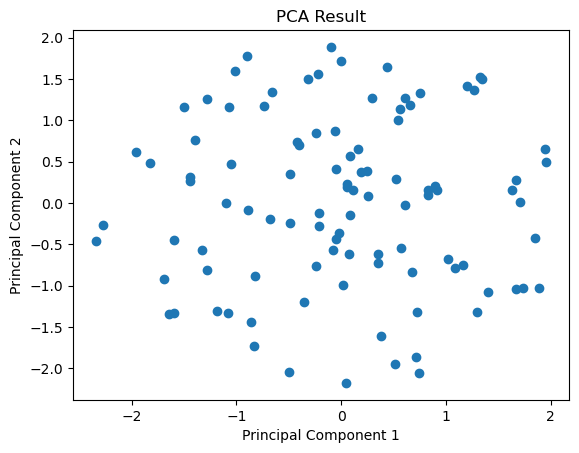

In [159]:
# Step 10: Visualize the results (for 2D data)
if n_components == 2:
    plt.scatter(final_result[:, 0], final_result[:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Result')
    plt.show()

# Linear Regression using gradient descent algorithm

In [162]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

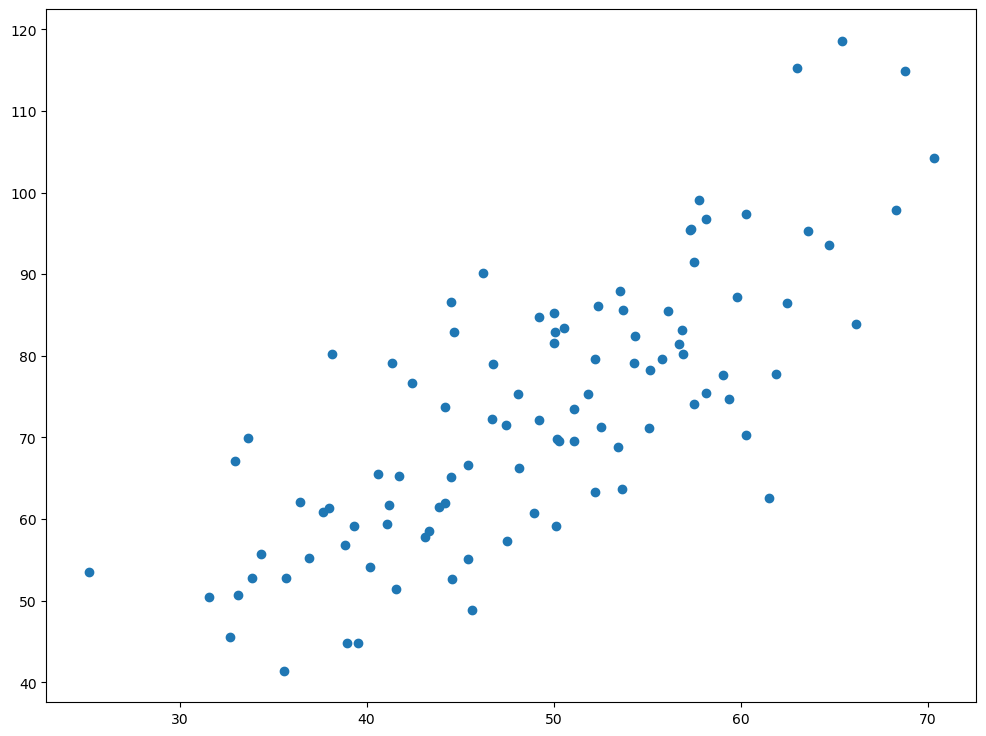

In [170]:
# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

plt.figure(figsize = (12.0, 9.0))
plt.scatter(X, Y)
plt.show()

In [172]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print ("m = ",m)
print("c = ",c)

m =  1.4796491688889395
c =  0.10148121494753737


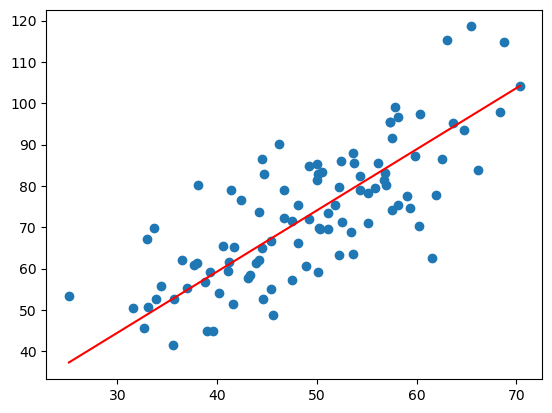

In [173]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

# K-means clustering 

In [178]:
#K-means Clustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [180]:
X = dataset.iloc[:, [3, 4]].values

In [182]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\Ashitha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


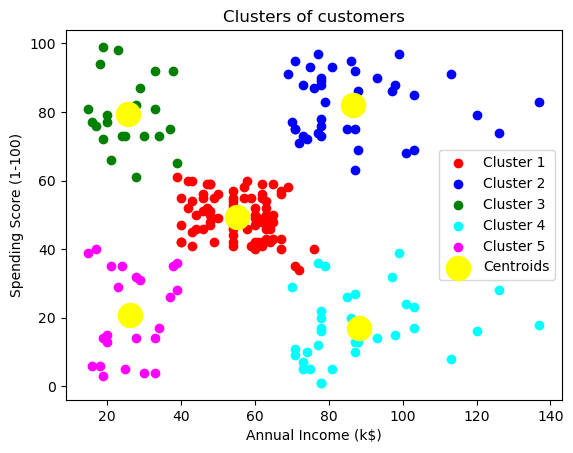

In [184]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Density based clustering

In [187]:
#Density Based Clustering
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv('blobs.csv')
data

,0,1
0,8.622185,1.935796
1,-4.736710,-7.970958
2,9.621222,0.925423
3,6.162095,-0.273254
4,8.697488,-1.057452
...,...,...
995,8.993880,2.203768
996,-5.082768,-9.644539
997,-6.252268,-8.412482
998,-5.479154,-10.536955


In [189]:
# Extract the features (assuming your CSV file has columns 'Feature1' and 'Feature2')
X = data.iloc[:,[0,1]].values
X

array([[  8.6222,   1.9358],
       [ -4.7367,  -7.971 ],
       [  9.6212,   0.9254],
       ...,
       [ -6.2523,  -8.4125],
       [ -5.4792, -10.537 ],
       [  6.1206,   0.969 ]])

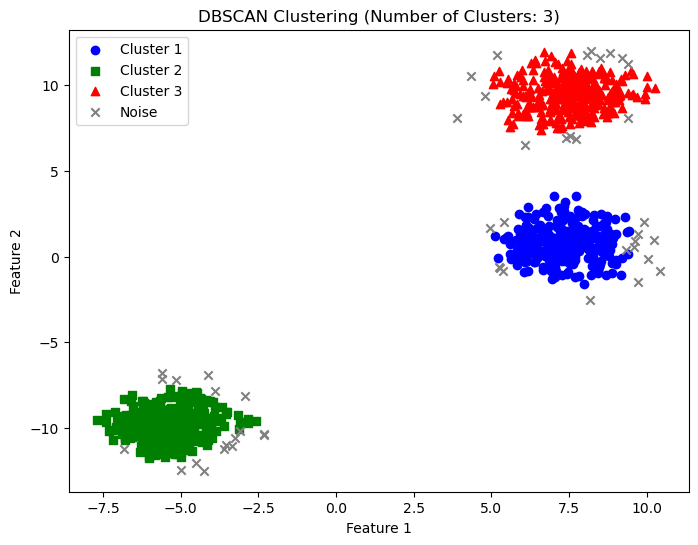

In [191]:
# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
y_db = db.fit_predict(X)

# Number of clusters in labels, ignoring noise if present (-1)
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y_db == 0][:, 0], X[y_db == 0][:, 1], c='blue', marker='o', label='Cluster 1')
plt.scatter(X[y_db == 1][:, 0], X[y_db == 1][:, 1], c='green', marker='s', label='Cluster 2')
plt.scatter(X[y_db == 2][:, 0], X[y_db == 2][:, 1], c='red', marker='^', label='Cluster 3')
plt.scatter(X[y_db == -1][:, 0], X[y_db == -1][:, 1], c='gray', marker='x', label='Noise')

# plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c='blue', marker='o', label='Cluster 1')
# plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c='green', marker='s', label='Cluster 2')
# plt.scatter(X[y_db == 2, 0], X[y_db == 2, 1], c='red', marker='^', label='Cluster 3')
# plt.scatter(X[y_db == -1, 0], X[y_db == -1, 1], c='gray', marker='x', label='Noise')


plt.legend(loc='best')
plt.title(f"DBSCAN Clustering (Number of Clusters: {n_clusters_})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()